In [570]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.semi_supervised import SelfTrainingClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import statistics
from statistics import mode
import timeit
import warnings
from sklearn.metrics import accuracy_score as acc

warnings.filterwarnings("ignore")


# Dataset-1(Online Shoppers)

In [571]:
D1_bal =[]
D1_skw = []

## Data Transformation

In [572]:
df1 = pd.read_csv('https://raw.githubusercontent.com/ashishgeorge009/Assignment_2/master/online_shoppers_intention.csv')

In [573]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [574]:
Y=df1['Revenue']
X=df1.drop('Revenue',axis=1)

In [575]:
Y = Y.astype(int)

In [576]:
X_numerical = X.drop(['Month','VisitorType'],axis=1)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_numerical)
X_num_scaled.shape #zero mean unit variance standardization
X_num_sc=pd.DataFrame(X_num_scaled,columns=list(X_numerical.columns))
X_scaled = pd.concat([X_num_sc,X[['Month','VisitorType']]],axis=1)
X_scaled_enc=X_scaled #made another variable just to preserve the above one
for i in ['VisitorType']:
    dummies = pd.get_dummies(X_scaled[i]) #1-hot encoding
    dummies.columns=str(i)+'_'+dummies.columns 
    X_scaled_enc = pd.concat([X_scaled_enc,dummies],axis=1)
    X_scaled_enc.drop(i,inplace=True,axis=1)
#label encoding month
le_month = LabelEncoder()
X_scaled_enc['Month'] = le_month.fit_transform(X_scaled_enc['Month'])


In [577]:
X_scaled_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  float64
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  float64
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  float64
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  float64
 11  Browser                        12330 non-null  float64
 12  Region                         12330 non-null 

In [578]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X_scaled_enc,Y,test_size=0.3,random_state=42)

## Feature Selection

In [579]:

sel_cols = SelectKBest(chi2, k=15)
sel_cols.fit(X_train, y_train)
topk = list(X_train.columns[sel_cols.get_support()])
topk

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Weekend',
 'Month',
 'VisitorType_New_Visitor',
 'VisitorType_Returning_Visitor']

In [580]:
X_train= X_train[topk]
X_test = X_test[topk]

In [581]:
#creating balanced and unbalanced data
smt = BorderlineSMOTE(random_state =42)
X_t_skew = X_train
y_t_skew = y_train
X_t_bal, y_bal = smt.fit_resample(X_train,y_train)


## Self_Training

*Balanced* Dataset

In [49]:
#self training

rfc = RandomForestClassifier(n_estimators=100, criterion =  'entropy', max_depth = 15, max_features = 'auto')
stc = SelfTrainingClassifier(rfc, thre)

In [50]:
#fully_supervised
rfc.fit(X_t_bal,y_bal)
pred = rfc.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
f1 = f1_score(y_test,pred)
print(f1)

[[2808  316]
 [ 135  440]]


              precision    recall  f1-score   support

           0       0.95      0.90      0.93      3124
           1       0.58      0.77      0.66       575

    accuracy                           0.88      3699
   macro avg       0.77      0.83      0.79      3699
weighted avg       0.90      0.88      0.88      3699

0.6611570247933884


In [51]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_bal.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[14596, 13136, 11676, 7298, 1459, 729]


Fitting and predicting

In [52]:
#fitting and caclulating f1 score for each percentage 
f1scores = []
for n in ratios:
  y_t = y_bal.copy()
  y_t[n:] = -1
  if (n==ratios[-1]):
    start = timeit.default_timer()
  stc = SelfTrainingClassifier(rfc)
  stc.fit(X_t_bal,y_t)
  if (n==ratios[-1]):
    stop = timeit.default_timer()
    time_for_95 = stop-start
  pred = stc.predict(X_test)
  f1scores.append(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

[0.6626596543951916, 0.6586102719033232, 0.6620689655172413, 0.6582491582491582, 0.604, 0.6287262872628726]
Runtime for 95% unlabeled data:  12.477540685998974


In [53]:
l = [0,10,20,50,90,95]

# f1scores.insert(0,f1)


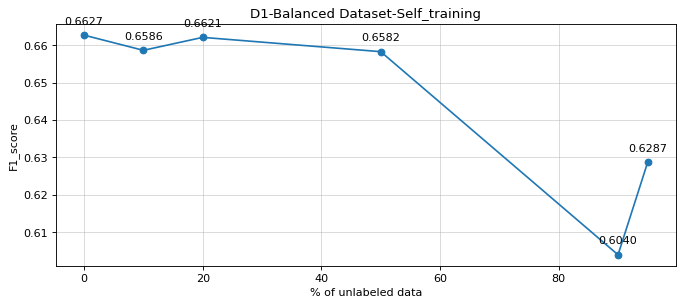

In [54]:


figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D1-Balanced Dataset-Self_training')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [55]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  0


ROC Plotting

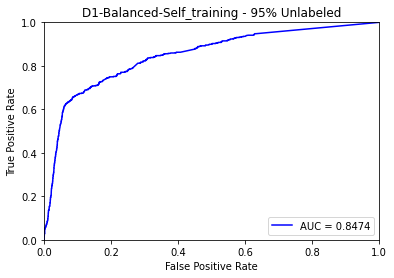

In [56]:
y_score = stc.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D1-Balanced-Self_training - 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [57]:
#since in real life scenario labeled data would be very low thus would be taking the sample with 5% labeled data as the main one
d1S_t_bal = f1scores[-1]
# D1_bal.append(d1S_t_bal)

Skewed Dataset

In [58]:
#fully_supervised
rfc.fit(X_t_skew,y_t_skew)
pred = rfc.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
f1 = f1_score(y_test,pred)
print(f1)

[[3006  118]
 [ 258  317]]


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.73      0.55      0.63       575

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699

0.6277227722772277


In [59]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_t_skew.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[8631, 7767, 6904, 4315, 863, 431]


Fitting and Predicting

In [60]:
f1scores = []
for n in ratios:
  y_t = y_t_skew.copy()
  y_t[n:] = -1
  if (n==ratios[-1]):
    start = timeit.default_timer()
  stc = SelfTrainingClassifier(rfc)
  stc.fit(X_t_skew,y_t)
  if (n==ratios[-1]):
    stop = timeit.default_timer()
    time_for_95 = stop-start
  pred = stc.predict(X_test)
  f1scores.append(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

[0.6214355948869223, 0.6329365079365079, 0.6210317460317459, 0.6169154228855721, 0.6245283018867924, 0.5914935707220573]
Runtime for 95% unlabeled data:  5.392804705996241


In [61]:
l = [0,10,20,50,90,95]

# f1scores.insert(0,f1)


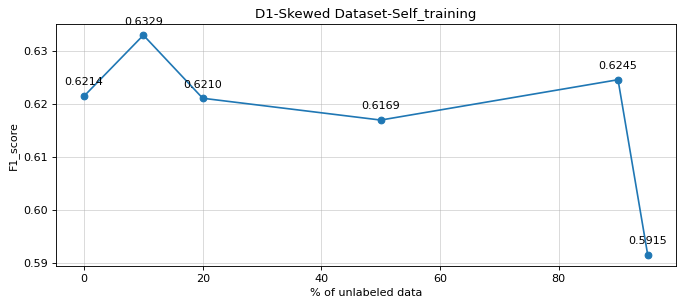

In [62]:


figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D1-Skewed Dataset-Self_training')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [63]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  10


ROC Plotting

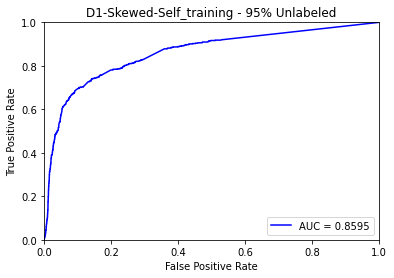

In [64]:
y_score = stc.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D1-Skewed-Self_training - 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [65]:
#since in real life scenario labeled data would be very low thus would be taking the sample with 5% labeled data as the main one
d1S_t_skew = f1scores[-1]
# D1_skw.append(S_t_skew)

In [66]:
# S_t = max(S_t_skew,S_t_bal)

## **Ensemble Code**

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import statistics
from statistics import mode


In [68]:
class ashishsemiensemble(): #created a bagging methode with majority classifier
  def __init__(self):
    #different models used for ensembel
    self.knn = SelfTrainingClassifier(KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3, weights= 'distance'))
    self.svm = SelfTrainingClassifier(SVC(probability=True, gamma="auto"))
    self.dtree = SelfTrainingClassifier(DecisionTreeClassifier(criterion = 'entropy', max_depth = 10))
    self.rfc = SelfTrainingClassifier(RandomForestClassifier(criterion= 'gini', max_depth = 8, max_features = 'auto', n_estimators = 100))
    self.mlp = SelfTrainingClassifier(MLPClassifier(activation = 'relu', alpha = 0.2, hidden_layer_sizes= (100, 3), learning_rate= 'constant'))
    self.gbc = SelfTrainingClassifier(GradientBoostingClassifier(criterion= 'mae', loss= 'exponential', n_estimators= 20))
    

    #fitting function--------------------------------
  def fit(self,X,y): 
    #extracting labeled data
    y_unlab = y[y==-1]
    y_labeled = y[y!=-1]
    X_labeled = X.loc[y[y!=-1].index]
    X_unlab = X.loc[y[y==-1].index]
    k= int(y_unlab.shape[0]) #finding the length of the unlabeled data

    
    #bagging the data-------------------------------------------
    size = int(k*0.2)
    start = 0
    end = size
    X_list = []
    y_list = []
    for i in range(0,6):
      xtrainer = pd.concat([X_labeled,X_unlab[start:end]])
      ytrainer = pd.concat([y_labeled,y_unlab[start:end]])
      X_list.append(xtrainer)
      y_list.append(ytrainer)
      start = start+int(0.7*size)
      end = end+int(0.7*size)
    
    #fitting the bagged data into different self training models
    self.knn.fit(X_list[0],y_list[0])
    print('Knnfitted')
    self.svm.fit(X_list[1],y_list[1])
    print('svmfitted')
    self.dtree.fit(X_list[2],y_list[2])
    print('dtreefitted')
    self.rfc.fit(X_list[3],y_list[3])
    print('rfcitted')
    self.mlp.fit(X_list[4],y_list[4])
    print('mlpfitted')
    self.gbc.fit(X_list[5],y_list[5])
    print('gbcfitted')
  
  #preditcion function-------------------
  def predict(self,X):
    predictions = []
    y_score =[]
    k=0
    for index,row in X.iterrows():
      predknn = self.knn.predict([row])[0]
      predsvm = self.svm.predict([row])[0]
      preddtree = self.dtree.predict([row])[0]
      predrfc = self.rfc.predict([row])[0]
      predmlp = self.mlp.predict([row])[0]
      predgbc = self.gbc.predict([row])[0]
      predlist = [predknn,predsvm,preddtree,predrfc,predmlp,predgbc,predrfc]
      predictions.append(mode(predlist))#selecting using majority voting

      # predic_score-------------------------------
      # if(k%1000==0):
      #   print(k)
      # k=k+1
    return pd.Series(data=predictions, index=X.index)
  
  #score_prediction
  def predict_proba(self,X):
    predknn = np.array(self.knn.predict_proba(X))
    predsvm = np.array(self.svm.predict_proba(X))
    preddtree = np.array(self.dtree.predict_proba(X))
    predrfc = np.array(self.rfc.predict_proba(X))
    predmlp = np.array(self.mlp.predict_proba(X))
    predgbc = np.array(self.gbc.predict_proba(X))
    # print(predknn)
    probab = (predknn+predsvm+preddtree+predrfc+predmlp+predgbc+predrfc)/7
    return probab




    
          
      
    



## Semi-Ensemble

Balanced Data

In [69]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_bal.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[14596, 13136, 11676, 7298, 1459, 729]


In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
#fitting and predicting
f1scores = []
for n in ratios:
  y_t = y_bal.copy()
  y_t[n:] = -1
  if (n==ratios[-1]):
    start = timeit.default_timer()
  ens= ashishsemiensemble()
  ens.fit(X_t_bal,y_t)
  if (n==ratios[-1]):
    stop = timeit.default_timer()
    time_for_95 = stop-start
  pred = ens.predict(X_test)
  f1scores.append(f1_score(y_test,pred))
  print(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.6596045197740114
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.6579139314369074
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.6651515151515152
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.5839572192513369
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.16666666666666666
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.555440414507772
[0.6596045197740114, 0.6579139314369074, 0.6651515151515152, 0.5839572192513369, 0.16666666666666666, 0.555440414507772]
Runtime for 95% unlabeled data:  21.212831157004985


In [72]:
l = [0,10,20,50,90,95]

F-1 score with % unlabeled Data

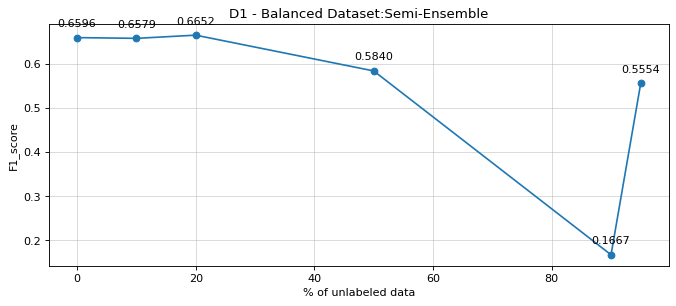

In [73]:
figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D1 - Balanced Dataset:Semi-Ensemble')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [74]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  20


ROC Plotting

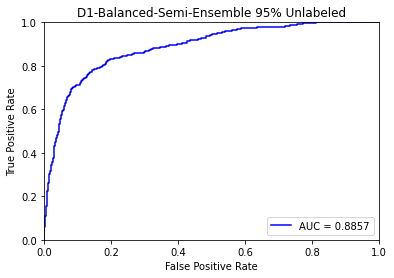

In [75]:
y_score = ens.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D1-Balanced-Semi-Ensemble 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [76]:
d1ens_bal = f1scores[-1]
# D1_bal.append(ens_bal)

Skewed Dataset

In [77]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_t_skew.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[8631, 7767, 6904, 4315, 863, 431]


In [78]:
f1scores = []
for n in ratios:
  y_t = y_t_skew.copy()
  y_t[n:] = -1
  if (n==ratios[-1]):
    start = timeit.default_timer()
  ens= ashishsemiensemble()
  ens.fit(X_t_skew,y_t)
  if (n==ratios[-1]):
    stop = timeit.default_timer()
    time_for_95 = stop-start
  pred = ens.predict(X_test)
  f1scores.append(f1_score(y_test,pred))
  print(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.5627802690582959
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.5896328293736501
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.5598243688254666
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.582441113490364
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.576307363927428
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.49767441860465106
[0.5627802690582959, 0.5896328293736501, 0.5598243688254666, 0.582441113490364, 0.576307363927428, 0.49767441860465106]
Runtime for 95% unlabeled data:  15.065627474003122


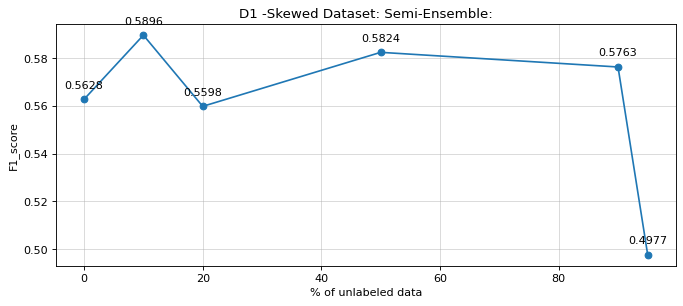

In [79]:
figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D1 -Skewed Dataset: Semi-Ensemble:')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [80]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  10


ROC Plotting

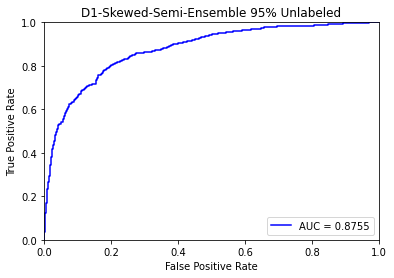

In [81]:
y_score = ens.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D1-Skewed-Semi-Ensemble 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [82]:
d1ens_skew = f1scores[-1]
# D1_skw.append(ens_skew)

## Gausian Mixture Clustering and Random Forest

In [596]:
class gausandrf(): #created a bagging methode with majority classifier
    def __init__(self):
        self.gm = GaussianMixture(n_components=2, random_state=42, covariance_type = 'full')
        self.rfc = RandomForestClassifier(criterion= 'gini', max_depth = 8, max_features = 'auto', n_estimators = 100)
#         self.rfctest = RandomForestClassifier(criterion= 'gini', max_depth = 8, max_features = 'auto', n_estimators = 100)
    
    

    #fitting function--------------------------------
    def fit(self,X,y): 
    #extracting labeled data
        y_unlab = y[y==-1]
        y_labeled = y[y!=-1]
        X_labeled = X.loc[y[y!=-1].index]
        X_unlab = X.loc[y[y==-1].index]
#         self.rfctest.fit(X_labeled,y_labeled)
        if(X_unlab.shape[0]!=0):
            self.gm.fit(X_unlab)
            y_tes = self.gm.predict(X_labeled)#creating to test if it is correctly classified
            y_unlab_lb = self.gm.predict(X_unlab)
            #testing the clusturing
            y_tes_t = list(map( lambda x: 1 if x==0 else 0,list(y_tes)))
            acc_2 = acc(y_labeled,y_tes_t)
#             print(acc_1,acc_2)
            if(acc_2>acc_1):
                y_unlab_lb = list(map( lambda x: 1 if x==0 else 0,list(y_unlab_lb)))#reversing the cluster labels
            X_train = pd.concat([X_labeled,X_unlab])
            y_train = pd.concat([y_labeled,pd.Series(y_unlab_lb, index = X_unlab.index)])
        else:
            X_train = X
            y_train = y
        self.rfc.fit(X_train,y_train)
    
  
    def predict(self,X):
        return self.rfc.predict(X)
 
    def predict_proba(self,X):
        return self.rfc.predict_proba(X)
    

In [582]:
# gm = GaussianMixture(n_components=2, random_state=42)
# rfc = SelfTrainingClassifier(RandomForestClassifier(criterion= 'gini', max_depth = 8, max_features = 'auto', n_estimators = 100))
# y = y_train
# X=X_train
# y[6000:]=-1
# y_unlab = y[y==-1]
# y_labeled = y[y!=-1]
# X_labeled = X.loc[y[y!=-1].index]
# X_unlab = X.loc[y[y==-1].index]


In [587]:
# gm.fit(X_unlab)
# y_tes = gm.predict(X_labeled)

# y_unlab_lb = gm.predict(X_unlab)
# acc_1 = acc(y_labeled,y_tes)
# y_tes_t = list(map( lambda x: 1 if x==0 else 0,list(y_tes)))
# acc_2 = acc(y_labeled,y_tes_t)
# print(acc_1,acc_2)
# if(acc_2>acc_1):
#     y_unlab_lb = list(map( lambda x: 1 if x==0 else 0,list(y_unlab_lb)))
# X_train = pd.concat([X_labeled,X_unlab])
# y_train = pd.concat([y_labeled,pd.Series(y_unlab_lb, index = X_unlab.index)])
# rfc.fit(X_train,y_train)
# pred = rfc.predict(X_test)
# f1_score(y_test,pred)

0.7516666666666667 0.24833333333333332


0.6460481099656357

Balanced Data

In [597]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_bal.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[14596, 13136, 11676, 7298, 1459, 729]


In [598]:
import warnings
warnings.filterwarnings("ignore")

In [599]:
f1scores = []
for n in ratios:
    y_t = y_bal.copy()
    y_t[n:] = -1
    if (n==ratios[-1]):
        start = timeit.default_timer()
    lbp= gausandrf()
    lbp.fit(X_t_bal,y_t)
    if (n==ratios[-1]):
        stop = timeit.default_timer()
        time_for_95 = stop-start
    pred = lbp.predict(X_test)
    f1scores.append(f1_score(y_test,pred))
    print(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

0.6591230551626591
0.658357771260997
0.6552006552006552
0.3352735739231665
0.26796929518492674
0.21253405994550406
[0.6591230551626591, 0.658357771260997, 0.6552006552006552, 0.3352735739231665, 0.26796929518492674, 0.21253405994550406]
Runtime for 95% unlabeled data:  1.5975748899945756


In [600]:
l = [0,10,20,50,90,95]

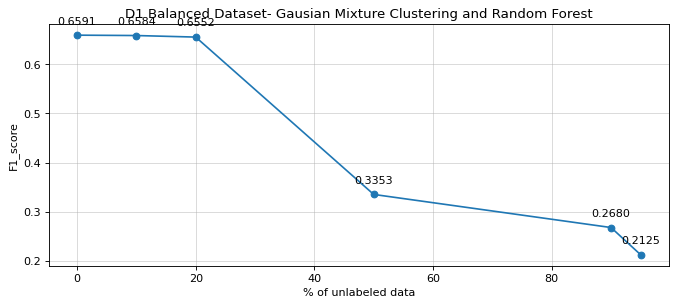

In [601]:
figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D1 Balanced Dataset- Gausian Mixture Clustering and Random Forest')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [602]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  0


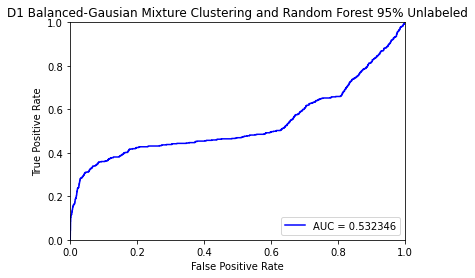

In [605]:
y_score = lbp.predict_proba(X_test)[:,1]
# y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D1 Balanced-Gausian Mixture Clustering and Random Forest 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#  y_scorel.shape
# metrics.plot_roc_curve(lbp, X_test, y_test,pos_label=1)


In [606]:
d1lbp_bal = f1scores[-1]
# D1_bal.append(lbp_bal)

Skewed Dataset

In [607]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_t_skew.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[8631, 7767, 6904, 4315, 863, 431]


In [608]:
f1scores = []
for n in ratios:
    y_t = y_t_skew.copy()
    y_t[n:] = -1
    if (n==ratios[-1]):
        start = timeit.default_timer()
    lbp= gausandrf()
    lbp.fit(X_t_skew,y_t)
    if (n==ratios[-1]):
        stop = timeit.default_timer()
        time_for_95 = stop-start
    pred = lbp.predict(X_test)
    f1scores.append(f1_score(y_test,pred))
    print(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

0.6452173913043479
0.6449957228400343
0.6474086661002549
0.6262341325811001
0.5200698080279232
0.5185614849187936
[0.6452173913043479, 0.6449957228400343, 0.6474086661002549, 0.6262341325811001, 0.5200698080279232, 0.5185614849187936]
Runtime for 95% unlabeled data:  0.8356661680008983


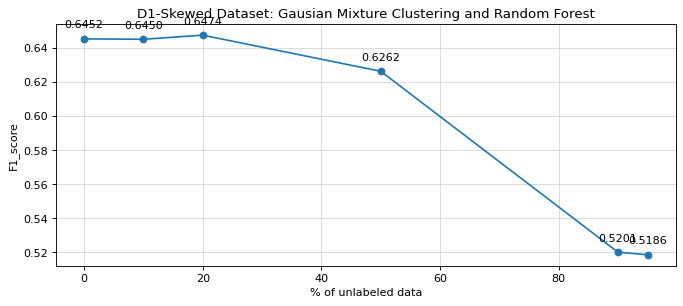

In [609]:
figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D1-Skewed Dataset: Gausian Mixture Clustering and Random Forest')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [610]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  20


ROC Curve

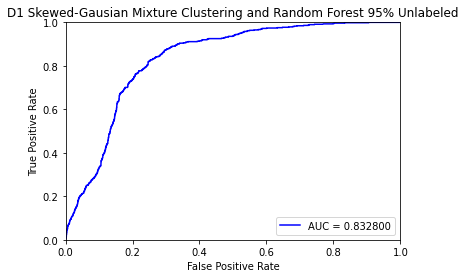

In [611]:
y_score = lbp.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D1 Skewed-Gausian Mixture Clustering and Random Forest 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#  y_scorel.shape
# metrics.plot_roc_curve(lbp, X_test, y_test,pos_label=1)


In [612]:
d1lbp_skew = f1scores[-1]
# D1_skw.append(lbp_skew)

# Dataset-2: Marketing Campaign

## Data Transformation

In [613]:
D2_bal = []
D2_skw = []

In [614]:
df2 = pd.read_csv('https://raw.githubusercontent.com/ashishgeorge009/Assignment_2/master/marketing_campaign.csv')

In [615]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [616]:
df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'])
df2['Dt_Customer'] = df2['Dt_Customer'].astype('int64')
avgInc = df2['Income'].mean()
df2['Income'].fillna(avgInc, inplace=True)
df2['Teenhome'] = df2['Teenhome'].map(lambda x : 1 if (x >= 1) else 0)

In [617]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   int64  
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [618]:
X= df2.drop(['Teenhome'], axis=1)
y= df2['Teenhome']

In [619]:
X['Education'] = X['Education'].map(lambda x: 1 if x=='Basic' else (2 if x=="Graduation" else (3 if x=="2n Cycle" else( 4 if x=="Master" else 5)) ) )
X.drop(['ID'], axis=1, inplace=True)
X_numerical = X.drop(['Marital_Status'],axis=1)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_numerical)
X_num_sc=pd.DataFrame(X_num_scaled,columns=list(X_numerical.columns))
X_scaled = pd.concat([X_num_sc,X[['Marital_Status']]],axis=1)
n=0
for i in X_scaled['Marital_Status']:
    if i in ['Single','Divorced', 'Widow', 'Alone','Absurd', 'YOLO']:
        X_scaled['Marital_Status'][n]=0
    else:
        X_scaled['Marital_Status'][n]=1
    n=n+1
X_scaled['Marital_Status'] = X_scaled['Marital_Status'].astype(int)


In [620]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   float64
 1   Education            2240 non-null   float64
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   float64
 4   Dt_Customer          2240 non-null   float64
 5   Recency              2240 non-null   float64
 6   MntWines             2240 non-null   float64
 7   MntFruits            2240 non-null   float64
 8   MntMeatProducts      2240 non-null   float64
 9   MntFishProducts      2240 non-null   float64
 10  MntSweetProducts     2240 non-null   float64
 11  MntGoldProds         2240 non-null   float64
 12  NumDealsPurchases    2240 non-null   float64
 13  NumWebPurchases      2240 non-null   float64
 14  NumCatalogPurchases  2240 non-null   float64
 15  NumStorePurchases    2240 non-null   f

In [621]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [622]:

sel_cols = SelectKBest(chi2, k=15)
sel_cols.fit(X_train, y_train)
topk = list(X_train.columns[sel_cols.get_support()])
topk

['Year_Birth',
 'Education',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'Response']

In [623]:
X_train= X_train[topk]
X_test = X_test[topk]

In [624]:
smt = BorderlineSMOTE(random_state =42)
X_t_skew = X_train
y_t_skew = y_train
X_t_bal, y_bal = smt.fit_resample(X_train,y_train)


## Self_Training

*Balanced* Dataset

In [109]:
#self training

rfc = RandomForestClassifier(n_estimators=100, criterion =  'entropy', max_depth = 15, max_features = 'auto')
stc = SelfTrainingClassifier(rfc)

In [110]:
#fully_supervised
rfc.fit(X_t_bal,y_bal)
pred = rfc.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
f1 = f1_score(y_test,pred)
print(f1)

[[276  58]
 [ 33 305]]


              precision    recall  f1-score   support

           0       0.89      0.83      0.86       334
           1       0.84      0.90      0.87       338

    accuracy                           0.86       672
   macro avg       0.87      0.86      0.86       672
weighted avg       0.87      0.86      0.86       672

0.8701854493580599


In [446]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_bal.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[1648, 1483, 1318, 824, 164, 82]


Fitting and predicting

In [112]:
#fitting and caclulating f1 score for each percentage 
f1scores = []
for n in ratios:
  y_t = y_bal.copy()
  y_t[n:] = -1
  if (n==ratios[-1]):
    start = timeit.default_timer()
  stc = SelfTrainingClassifier(rfc)
  stc.fit(X_t_bal,y_t)
  if (n==ratios[-1]):
    stop = timeit.default_timer()
    time_for_95 = stop-start
  pred = stc.predict(X_test)
  f1scores.append(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

[0.8670520231213873, 0.866571018651363, 0.8712871287128714, 0.8579626972740316, 0.8414985590778098, 0.8330871491875923]
Runtime for 95% unlabeled data:  1.8119405039979029


In [113]:
l = [0,10,20,50,90,95]

# f1scores.insert(0,f1)


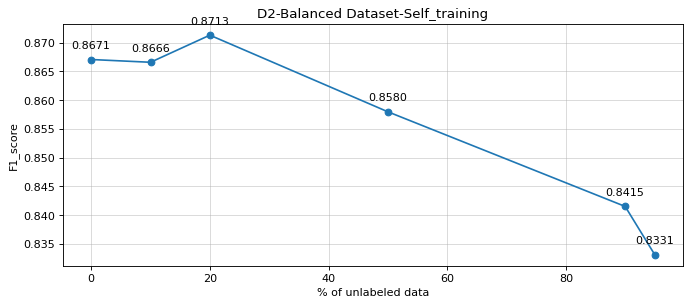

In [114]:


figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D2-Balanced Dataset-Self_training')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [115]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  20


ROC Plotting

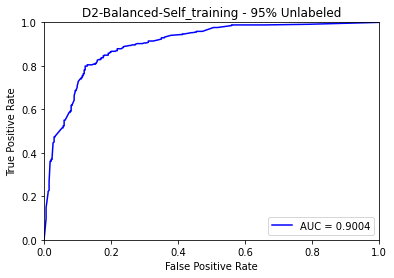

In [116]:
y_score = stc.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D2-Balanced-Self_training - 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [117]:
#since in real life scenario labeled data would be very low thus would be taking the sample with 5% labeled data as the main one
d2S_t_bal = f1scores[-1]
# D2_bal.append(S_t_bal)

Skewed Dataset

In [118]:
#fully_supervised
rfc.fit(X_t_skew,y_t_skew)
pred = rfc.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
f1 = f1_score(y_test,pred)
print(f1)

[[279  55]
 [ 37 301]]


              precision    recall  f1-score   support

           0       0.88      0.84      0.86       334
           1       0.85      0.89      0.87       338

    accuracy                           0.86       672
   macro avg       0.86      0.86      0.86       672
weighted avg       0.86      0.86      0.86       672

0.8674351585014409


In [119]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_t_skew.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[1568, 1411, 1254, 784, 156, 78]


Fitting and Predicting

In [120]:
f1scores = []
for n in ratios:
  y_t = y_t_skew.copy()
  y_t[n:] = -1
  if (n==ratios[-1]):
    start = timeit.default_timer()
  stc = SelfTrainingClassifier(rfc)
  stc.fit(X_t_skew,y_t)
  if (n==ratios[-1]):
    stop = timeit.default_timer()
    time_for_95 = stop-start
  pred = stc.predict(X_test)
  f1scores.append(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

[0.8706896551724138, 0.867816091954023, 0.8731988472622478, 0.8563218390804598, 0.8256333830104321, 0.8275862068965516]
Runtime for 95% unlabeled data:  1.7373154859960778


In [121]:
l = [0,10,20,50,90,95]

# f1scores.insert(0,f1)


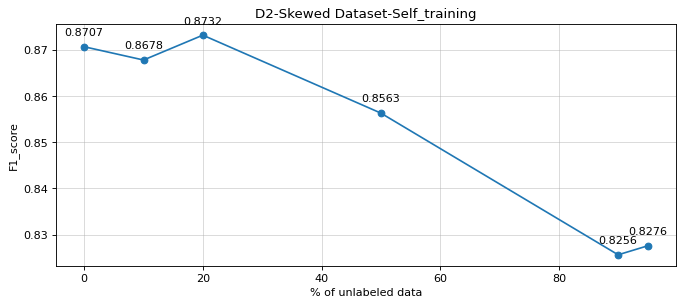

In [122]:


figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D2-Skewed Dataset-Self_training')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [123]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  20


ROC Plotting

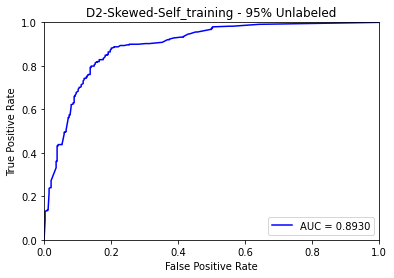

In [124]:
y_score = stc.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D2-Skewed-Self_training - 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [125]:
#since in real life scenario labeled data would be very low thus would be taking the sample with 5% labeled data as the main one
d2S_t_skew = f1scores[-1]
# D2_skw.append(S_t_skew)

In [126]:
# S_t = max(S_t_skew,S_t_bal)

## Semi-Ensemble

Balanced Data

In [127]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_bal.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[1648, 1483, 1318, 824, 164, 82]


In [128]:
import warnings
warnings.filterwarnings("ignore")

In [129]:
#fitting and predicting
f1scores = []
for n in ratios:
  y_t = y_bal.copy()
  y_t[n:] = -1
  if (n==ratios[-1]):
    start = timeit.default_timer()
  ens= ashishsemiensemble()
  ens.fit(X_t_bal,y_t)
  if (n==ratios[-1]):
    stop = timeit.default_timer()
    time_for_95 = stop-start
  pred = ens.predict(X_test)
  f1scores.append(f1_score(y_test,pred))
  print(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8653295128939829
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8538011695906432
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8690647482014388
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8587896253602305
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8419540229885057
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8216833095577747
[0.8653295128939829, 0.8538011695906432, 0.8690647482014388, 0.8587896253602305, 0.8419540229885057, 0.8216833095577747]
Runtime for 95% unlabeled data:  8.905284473999927


In [130]:
l = [0,10,20,50,90,95]

F-1 score with % unlabeled Data

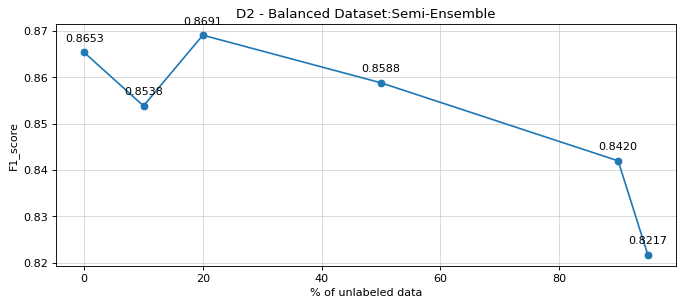

In [131]:
figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D2 - Balanced Dataset:Semi-Ensemble')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [132]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  20


ROC Plotting

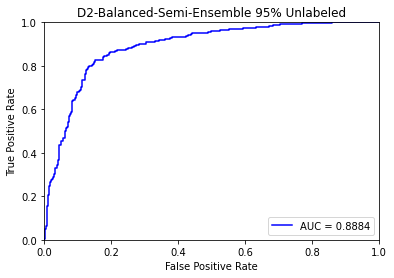

In [133]:
y_score = ens.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D2-Balanced-Semi-Ensemble 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [134]:
d2ens_bal = f1scores[-1]
# D2_bal.append(ens_bal)

Skewed Dataset

In [135]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_t_skew.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[1568, 1411, 1254, 784, 156, 78]


In [136]:
f1scores = []
for n in ratios:
  y_t = y_t_skew.copy()
  y_t[n:] = -1
  if (n==ratios[-1]):
    start = timeit.default_timer()
  ens= ashishsemiensemble()
  ens.fit(X_t_skew,y_t)
  if (n==ratios[-1]):
    stop = timeit.default_timer()
    time_for_95 = stop-start
  pred = ens.predict(X_test)
  f1scores.append(f1_score(y_test,pred))
  print(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8571428571428573
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8658892128279883
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8530259365994237
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8496350364963503
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.828080229226361
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8309037900874634
[0.8571428571428573, 0.8658892128279883, 0.8530259365994237, 0.8496350364963503, 0.828080229226361, 0.8309037900874634]
Runtime for 95% unlabeled data:  5.134727552998811


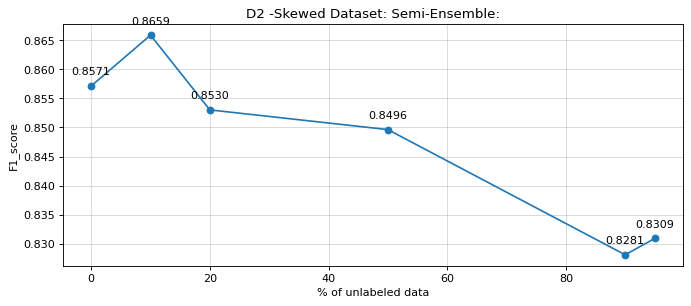

In [137]:
figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D2 -Skewed Dataset: Semi-Ensemble:')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [138]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  10


ROC Plotting

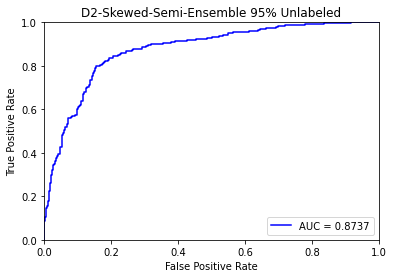

In [139]:
y_score = ens.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D2-Skewed-Semi-Ensemble 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [140]:
d2ens_skew = f1scores[-1]
# D2_skw.append(ens_skew)

## Gausian Mixture Clustering and Random Forest

Balanced Data

In [625]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_bal.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[1648, 1483, 1318, 824, 164, 82]


In [626]:
import warnings
warnings.filterwarnings("ignore")

In [627]:
f1scores = []
for n in ratios:
    y_t = y_bal.copy()
    y_t[n:] = -1
    if (n==ratios[-1]):
        start = timeit.default_timer()
    lbp= gausandrf()
    lbp.fit(X_t_bal,y_t)
    if (n==ratios[-1]):
        stop = timeit.default_timer()
        time_for_95 = stop-start
    pred = lbp.predict(X_test)
    f1scores.append(f1_score(y_test,pred))
    print(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

0.8673323823109843
0.8416289592760181
0.8228043143297381
0.3178807947019868
0.178343949044586
0.17721518987341772
[0.8673323823109843, 0.8416289592760181, 0.8228043143297381, 0.3178807947019868, 0.178343949044586, 0.17721518987341772]
Runtime for 95% unlabeled data:  0.38887437200173736


In [628]:
l = [0,10,20,50,90,95]

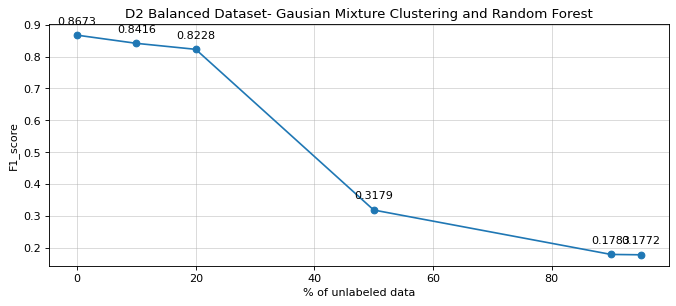

In [629]:
figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D2 Balanced Dataset- Gausian Mixture Clustering and Random Forest')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [630]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  0


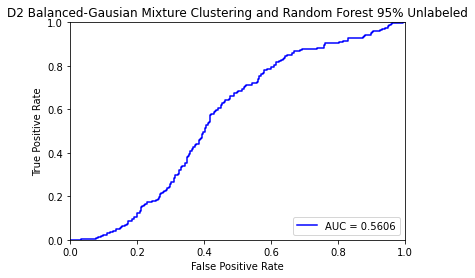

In [633]:
y_score = lbp.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D2 Balanced-Gausian Mixture Clustering and Random Forest 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#  y_scorel.shape
# metrics.plot_roc_curve(lbp, X_test, y_test,pos_label=1)


In [634]:
d2lbp_bal = f1scores[-1]
# D2_bal.append(lbp_bal)

Skewed Dataset

In [635]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_t_skew.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[1568, 1411, 1254, 784, 156, 78]


In [636]:
f1scores = []
for n in ratios:
    y_t = y_t_skew.copy()
    y_t[n:] = -1
    if (n==ratios[-1]):
        start = timeit.default_timer()
    lbp= gausandrf()
    lbp.fit(X_t_skew,y_t)
    if (n==ratios[-1]):
        stop = timeit.default_timer()
        time_for_95 = stop-start
    pred = lbp.predict(X_test)
    f1scores.append(f1_score(y_test,pred))
    print(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

0.8620689655172413
0.8473053892215568
0.823529411764706
0.3231441048034935
0.6788571428571428
0.17721518987341772
[0.8620689655172413, 0.8473053892215568, 0.823529411764706, 0.3231441048034935, 0.6788571428571428, 0.17721518987341772]
Runtime for 95% unlabeled data:  0.3472336769918911


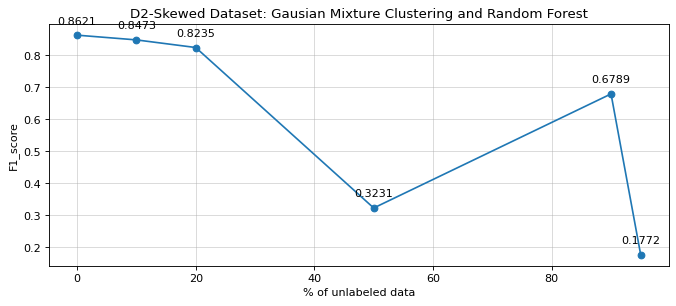

In [638]:
figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D2-Skewed Dataset: Gausian Mixture Clustering and Random Forest')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [639]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  0


ROC Curve

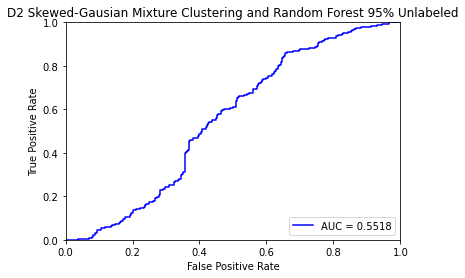

In [641]:
y_score = lbp.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D2 Skewed-Gausian Mixture Clustering and Random Forest 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#  y_scorel.shape
# metrics.plot_roc_curve(lbp, X_test, y_test,pos_label=1)


In [642]:
d2lbp_skew = f1scores[-1]
# D2_skw.append(lbp_skew)

# Dataset 3-Heart Disease

In [643]:
D3_bal=[]
D3_skw=[]

In [644]:
df3 = pd.read_csv('https://raw.githubusercontent.com/ashishgeorge009/Assignment_2/master/heart.csv')

In [645]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [646]:
X=df3.drop(['target'],axis=1)
y=df3['target']

In [647]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X)
X_num_scaled.shape #zero mean unit variance standardization

(303, 13)

In [648]:
X_num_sc=pd.DataFrame(X_num_scaled,columns=list(X.columns))

In [649]:
X_train, X_test, y_train,y_test = train_test_split(X_num_sc,y,test_size=0.3,random_state=42)

In [650]:
smt = BorderlineSMOTE(random_state =42)
X_t_skew = X_train
y_t_skew = y_train
X_t_bal, y_bal = smt.fit_resample(X_train,y_train)


## Self_Training

*Balanced* Dataset

In [163]:
#self training

rfc = RandomForestClassifier(n_estimators=100, criterion =  'entropy', max_depth = 15, max_features = 'auto')
stc = SelfTrainingClassifier(rfc)

In [164]:
#fully_supervised
rfc.fit(X_t_bal,y_bal)
pred = rfc.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
f1 = f1_score(y_test,pred)
print(f1)

[[32  9]
 [10 40]]


              precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

0.8080808080808082


In [165]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_bal.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[230, 207, 184, 115, 23, 11]


Fitting and predicting

In [166]:
#fitting and caclulating f1 score for each percentage 
f1scores = []
for n in ratios:
  y_t = y_bal.copy()
  y_t[n:] = -1
  if (n==ratios[-1]):
    start = timeit.default_timer()
  stc = SelfTrainingClassifier(rfc)
  stc.fit(X_t_bal,y_t)
  if (n==ratios[-1]):
    stop = timeit.default_timer()
    time_for_95 = stop-start
  pred = stc.predict(X_test)
  f1scores.append(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

[0.8399999999999999, 0.816326530612245, 0.8543689320388349, 0.8712871287128714, 0.7575757575757575, 0.7092198581560284]
Runtime for 95% unlabeled data:  0.4744906640044064


In [167]:
l = [0,10,20,50,90,95]

# f1scores.insert(0,f1)


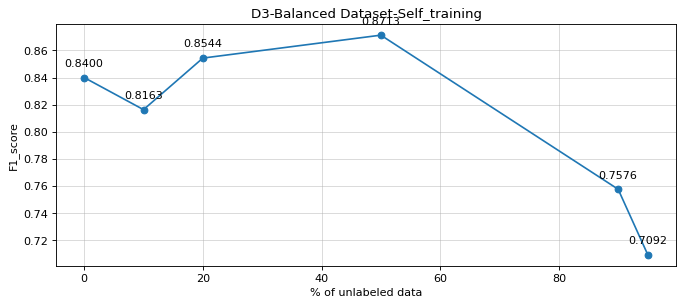

In [168]:


figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D3-Balanced Dataset-Self_training')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [169]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  50


ROC Plotting

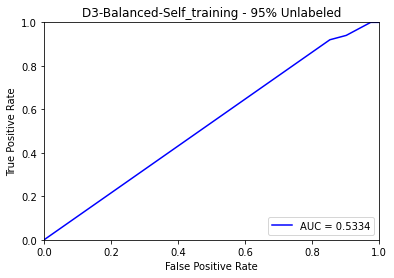

In [170]:
y_score = stc.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D3-Balanced-Self_training - 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [171]:
#since in real life scenario labeled data would be very low thus would be taking the sample with 5% labeled data as the main one
d3S_t_bal = f1scores[-1]
# D3_bal.append(S_t_bal)

Skewed Dataset

In [172]:
#fully_supervised
rfc.fit(X_t_skew,y_t_skew)
pred = rfc.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
f1 = f1_score(y_test,pred)
print(f1)

[[32  9]
 [ 7 43]]


              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

0.8431372549019608


In [173]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_t_skew.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[212, 190, 169, 106, 21, 10]


Fitting and Predicting

In [174]:
f1scores = []
for n in ratios:
  y_t = y_t_skew.copy()
  y_t[n:] = -1
  if (n==ratios[-1]):
    start = timeit.default_timer()
  stc = SelfTrainingClassifier(rfc)
  stc.fit(X_t_skew,y_t)
  if (n==ratios[-1]):
    stop = timeit.default_timer()
    time_for_95 = stop-start
  pred = stc.predict(X_test)
  f1scores.append(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

[0.836734693877551, 0.8399999999999999, 0.82, 0.8453608247422681, 0.7538461538461539, 0.7092198581560284]
Runtime for 95% unlabeled data:  0.47210450699640205


In [175]:
l = [0,10,20,50,90,95]

# f1scores.insert(0,f1)


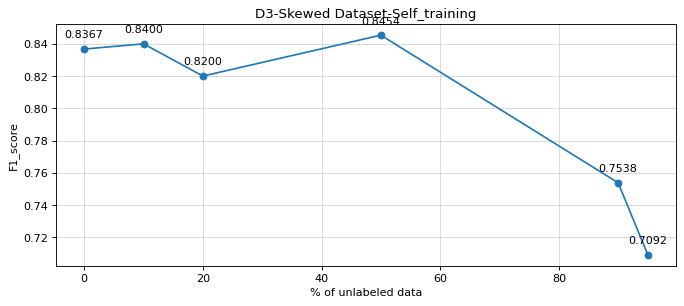

In [176]:


figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D3-Skewed Dataset-Self_training')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [177]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  50


ROC Plotting

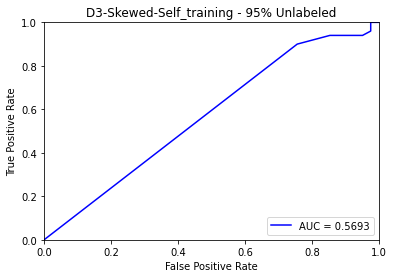

In [178]:
y_score = stc.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D3-Skewed-Self_training - 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [179]:
#since in real life scenario labeled data would be very low thus would be taking the sample with 5% labeled data as the main one
d3S_t_skew = f1scores[-1]
# D3_skw.append(S_t_skew)

In [180]:
# S_t = max(S_t_skew,S_t_bal)

## Semi-Ensemble

Balanced Data

In [181]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_bal.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[230, 207, 184, 115, 23, 11]


In [182]:
import warnings
warnings.filterwarnings("ignore")

In [183]:
#fitting and predicting
f1scores = []
for n in ratios:
  y_t = y_bal.copy()
  y_t[n:] = -1
  if (n==ratios[-1]):
    start = timeit.default_timer()
  ens= ashishsemiensemble()
  ens.fit(X_t_bal,y_t)
  if (n==ratios[-1]):
    stop = timeit.default_timer()
    time_for_95 = stop-start
  pred = ens.predict(X_test)
  f1scores.append(f1_score(y_test,pred))
  print(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8484848484848485
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8627450980392156
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8431372549019608
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8282828282828283
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.7272727272727273
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.7092198581560284
[0.8484848484848485, 0.8627450980392156, 0.8431372549019608, 0.8282828282828283, 0.7272727272727273, 0.7092198581560284]
Runtime for 95% unlabeled data:  0.8197509500023443


In [184]:
l = [0,10,20,50,90,95]

F-1 score with % unlabeled Data

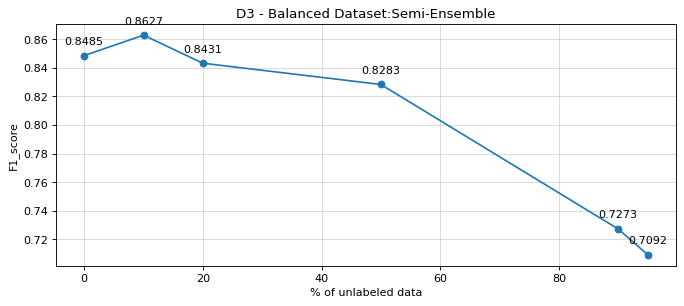

In [185]:
figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D3 - Balanced Dataset:Semi-Ensemble')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [186]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  10


ROC Plotting

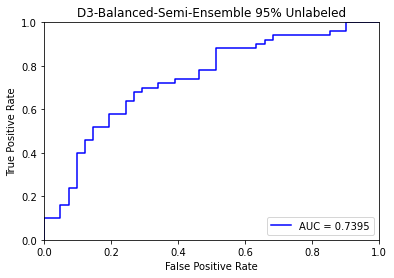

In [187]:
y_score = ens.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D3-Balanced-Semi-Ensemble 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [188]:
d3ens_bal = f1scores[-1]
# D3_bal.append(ens_bal)

Skewed Dataset

In [189]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_t_skew.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[212, 190, 169, 106, 21, 10]


In [190]:
f1scores = []
for n in ratios:
  y_t = y_t_skew.copy()
  y_t[n:] = -1
  if (n==ratios[-1]):
    start = timeit.default_timer()
  ens= ashishsemiensemble()
  ens.fit(X_t_skew,y_t)
  if (n==ratios[-1]):
    stop = timeit.default_timer()
    time_for_95 = stop-start
  pred = ens.predict(X_test)
  f1scores.append(f1_score(y_test,pred))
  print(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8599999999999999
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8282828282828283
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8282828282828283
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.8316831683168315
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.7758620689655172
Knnfitted
svmfitted
dtreefitted
rfcitted
mlpfitted
gbcfitted
0.7092198581560284
[0.8599999999999999, 0.8282828282828283, 0.8282828282828283, 0.8316831683168315, 0.7758620689655172, 0.7092198581560284]
Runtime for 95% unlabeled data:  0.8320882649932173


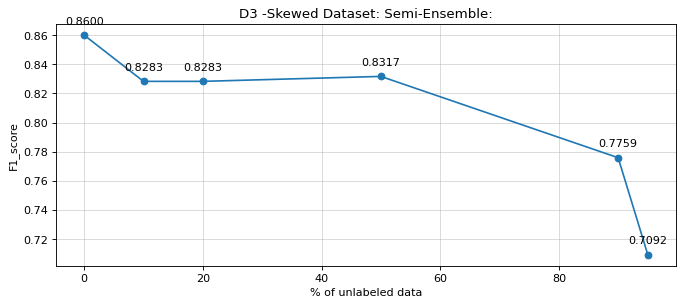

In [191]:
figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D3 -Skewed Dataset: Semi-Ensemble:')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [192]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  0


ROC Plotting

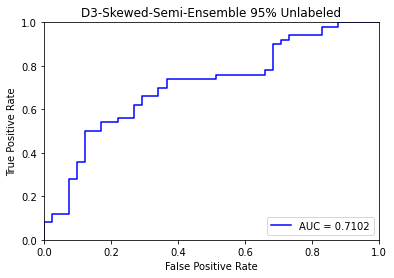

In [193]:
y_score = ens.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D3-Skewed-Semi-Ensemble 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [194]:
d3ens_skew = f1scores[-1]
# D3_skw.append(ens_skew)

## Gausian Mixture Clustering and Random Forest

Balanced Data

In [651]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_bal.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[230, 207, 184, 115, 23, 11]


In [652]:
import warnings
warnings.filterwarnings("ignore")

In [653]:
f1scores = []
for n in ratios:
    y_t = y_bal.copy()
    y_t[n:] = -1
    if (n==ratios[-1]):
        start = timeit.default_timer()
    lbp= gausandrf()
    lbp.fit(X_t_bal,y_t)
    if (n==ratios[-1]):
        stop = timeit.default_timer()
        time_for_95 = stop-start
    pred = lbp.predict(X_test)
    f1scores.append(f1_score(y_test,pred))
    print(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

0.8080808080808082
0.8431372549019608
0.819047619047619
0.6075949367088608
0.7454545454545455
0.7454545454545455
[0.8080808080808082, 0.8431372549019608, 0.819047619047619, 0.6075949367088608, 0.7454545454545455, 0.7454545454545455]
Runtime for 95% unlabeled data:  0.11488047800958157


In [654]:
l = [0,10,20,50,90,95]

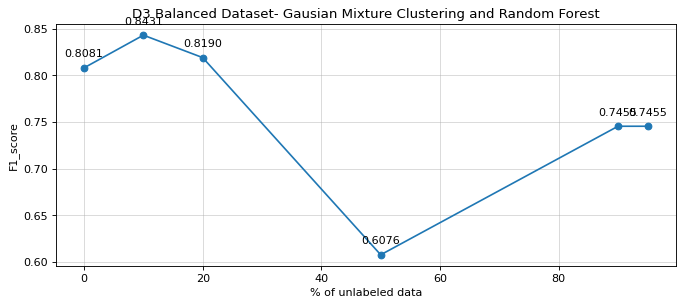

In [655]:
figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D3 Balanced Dataset- Gausian Mixture Clustering and Random Forest')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [656]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  10


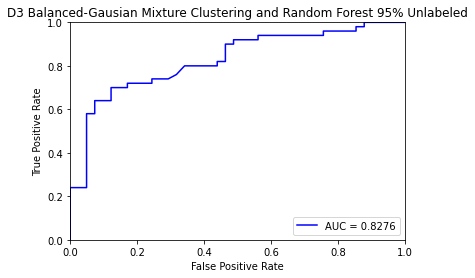

In [657]:
y_score = lbp.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D3 Balanced-Gausian Mixture Clustering and Random Forest 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#  y_scorel.shape
# metrics.plot_roc_curve(lbp, X_test, y_test,pos_label=1)


In [658]:
d3lbp_bal = f1scores[-1]
# D3_bal.append(lbp_bal)

Skewed Dataset

In [659]:
ls = [1,0.9,0.8,0.5,0.1,0.05]
x = y_t_skew.shape[0]
ratios = [int(i*x) for i in ls]
print(ratios)

[212, 190, 169, 106, 21, 10]


In [660]:
f1scores = []
for n in ratios:
    y_t = y_t_skew.copy()
    y_t[n:] = -1
    if (n==ratios[-1]):
        start = timeit.default_timer()
    lbp= gausandrf()
    lbp.fit(X_t_skew,y_t)
    if (n==ratios[-1]):
        stop = timeit.default_timer()
        time_for_95 = stop-start
    pred = lbp.predict(X_test)
    f1scores.append(f1_score(y_test,pred))
    print(f1_score(y_test,pred))
print(f1scores)
print("Runtime for 95% unlabeled data: ",time_for_95)

0.82
0.8316831683168315
0.8
0.7735849056603773
0.7454545454545455
0.7454545454545455
[0.82, 0.8316831683168315, 0.8, 0.7735849056603773, 0.7454545454545455, 0.7454545454545455]
Runtime for 95% unlabeled data:  0.11502000599284656


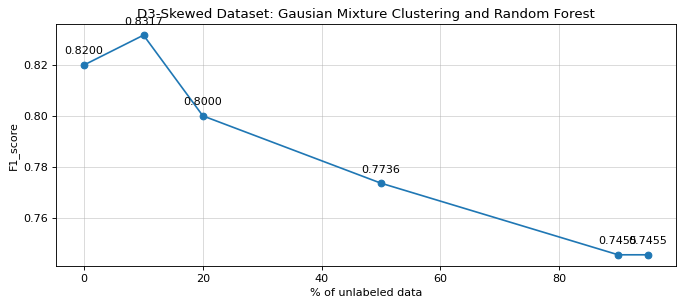

In [661]:
figure(figsize=(10, 4), dpi=80)    

plt.xlabel("% of unlabeled data")
plt.ylabel("F1_score")
plt.title('D3-Skewed Dataset: Gausian Mixture Clustering and Random Forest')
for x,y in zip(l,f1scores):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(which='major', alpha=0.5)
plt.plot(l,f1scores,marker="o")
plt.show()

In [662]:
maxf1 = max(f1scores)
maxindex = f1scores.index(maxf1)
maxpercent=l[maxindex]
print("The % of unlabeled data with maximum f1 score: ", maxpercent)

The % of unlabeled data with maximum f1 score:  10


ROC Curve

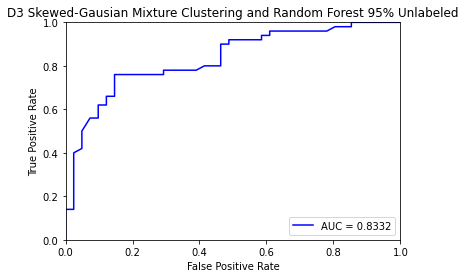

In [663]:
y_score = lbp.predict_proba(X_test)[:,1]
y_score[np.isnan(y_score)] = 0.5
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('D3 Skewed-Gausian Mixture Clustering and Random Forest 95% Unlabeled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#  y_scorel.shape
# metrics.plot_roc_curve(lbp, X_test, y_test,pos_label=1)


In [664]:
d3lbp_skew = f1scores[-1]
# D3_skw.append(lbp_skew)

# Friedman Test

In [665]:
D1_bal =[d1S_t_bal,d1ens_bal,d1lbp_bal]
D1_skw =[d1S_t_skew,d1ens_skew,d1lbp_skew]
print(D1_bal)
print(D1_skw)

[0.6287262872628726, 0.555440414507772, 0.21253405994550406]
[0.5914935707220573, 0.49767441860465106, 0.5185614849187936]


In [666]:
D2_bal =[d2S_t_bal,d2ens_bal,d2lbp_bal]
D2_skw =[d2S_t_skew,d2ens_skew,d2lbp_skew]
print(D2_bal)
print(D2_skw)

[0.8330871491875923, 0.8216833095577747, 0.17721518987341772]
[0.8275862068965516, 0.8309037900874634, 0.17721518987341772]


In [667]:
D3_bal =[d3S_t_bal,d3ens_bal,d3lbp_bal]
D3_skw =[d3S_t_skew,d3ens_skew,d3lbp_skew]
print(D3_bal)
print(D3_skw)

[0.7092198581560284, 0.7092198581560284, 0.7454545454545455]
[0.7092198581560284, 0.7092198581560284, 0.7454545454545455]


In [668]:
ftest_bal =  pd.DataFrame([D1_bal,D2_bal,D3_bal],columns=['Self_training','Semi-Ensemble','GausMix_rf'])
ftest_bal

,Self_training,Semi-Ensemble,GausMix_rf
0,0.628726,0.555440,0.212534
1,0.833087,0.821683,0.177215
2,0.709220,0.709220,0.745455


In [669]:
from scipy import stats
stat, p = stats.friedmanchisquare(ftest_bal['Self_training'],ftest_bal['Semi-Ensemble'],ftest_bal['GausMix_rf'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha =0.1
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=1.273, p=0.529
Same distributions (fail to reject H0)


In [670]:
ftest_skw =  pd.DataFrame([D1_skw,D2_skw,D3_skw],columns=['Self_training','Semi-Ensemble','GausMix_rf'])
ftest_skw

,Self_training,Semi-Ensemble,GausMix_rf
0,0.591494,0.497674,0.518561
1,0.827586,0.830904,0.177215
2,0.709220,0.709220,0.745455


In [671]:
stat, p = stats.friedmanchisquare(ftest_skw['Self_training'],ftest_skw['Semi-Ensemble'],ftest_skw['GausMix_rf'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha =0.1
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=0.182, p=0.913
Same distributions (fail to reject H0)


In [673]:
# import scikit_posthocs as sp
# sp.posthoc_nemenyi_friedman(ftest_skw)